In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV

In [2]:
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
cp = pd.get_dummies(df['cp'], 'cp')
thal = pd.get_dummies(df['thal'], 'thal')
slope = pd.get_dummies(df['slope'], 'slope')

df = pd.concat([df, cp, thal, slope], axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [5]:
X = df.drop('target', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,0,0,0,0,0,0,1,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,0,0,1,0,0,0,1,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,0,0,0,0,0,0,1,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,0,0,0,0,0,0,1,0,1,0


In [6]:
y = df['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
152,64,1,3,170,227,0,0,155,0,0.6,...,0,0,1,0,0,0,1,0,1,0
53,44,0,2,108,141,0,1,175,0,0.6,...,0,1,0,0,0,1,0,0,1,0
79,58,1,2,105,240,0,0,154,1,0.6,...,0,1,0,0,0,0,1,0,1,0
143,67,0,0,106,223,0,1,142,0,0.3,...,0,0,0,0,0,1,0,0,0,1
209,59,1,0,140,177,0,1,162,1,0.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,51,1,2,100,222,0,1,143,1,1.2,...,0,1,0,0,0,1,0,0,1,0
219,48,1,0,130,256,1,0,150,1,0.0,...,0,0,0,0,0,0,1,0,0,1
106,69,1,3,160,234,1,0,131,0,0.1,...,0,0,1,0,0,1,0,0,1,0
292,58,0,0,170,225,1,0,146,1,2.8,...,0,0,0,0,1,0,0,0,1,0


In [9]:
y_test

259    0
22     1
245    0
273    0
231    0
      ..
30     1
135    1
83     1
213    0
272    0
Name: target, Length: 76, dtype: int64

In [10]:
accuracies = []

# Naive Bayes' Classifier

In [11]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

te_acc = nb.score(X_test,y_test)
tr_acc = nb.score(X_train,y_train)
accuracies.append({
    'model' : 'Naive Bayes',
    'train_accuracy': round(tr_acc * 100, 2),
    'test_accuracy': round(te_acc * 100, 2)
})
accuracies

[{'model': 'Naive Bayes', 'train_accuracy': 82.82, 'test_accuracy': 86.84}]

# Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

te_acc = dtc.score(X_test,y_test)
tr_acc = dtc.score(X_train,y_train)
accuracies.append({
    'model' : 'Decision Tree',
    'train_accuracy': round(tr_acc * 100, 2),
    'test_accuracy': round(te_acc * 100, 2)
})
accuracies

[{'model': 'Naive Bayes', 'train_accuracy': 82.82, 'test_accuracy': 86.84},
 {'model': 'Decision Tree', 'train_accuracy': 100.0, 'test_accuracy': 80.26}]

# KNN


In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
te_acc = knn.score(X_test,y_test)
tr_acc = knn.score(X_train,y_train)
accuracies.append({
    'model' : 'KNN',
    'train_accuracy': round(tr_acc * 100, 2),
    'test_accuracy': round(te_acc * 100, 2)
})
accuracies

[{'model': 'Naive Bayes', 'train_accuracy': 82.82, 'test_accuracy': 86.84},
 {'model': 'Decision Tree', 'train_accuracy': 100.0, 'test_accuracy': 80.26},
 {'model': 'KNN', 'train_accuracy': 79.3, 'test_accuracy': 63.16}]

# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
te_acc = rf.score(X_test,y_test)
tr_acc = rf.score(X_train,y_train)
accuracies.append({
    'model' : 'Random Forest',
    'train_accuracy': round(tr_acc * 100, 2),
    'test_accuracy': round(te_acc * 100, 2)
})
accuracies

[{'model': 'Naive Bayes', 'train_accuracy': 82.82, 'test_accuracy': 86.84},
 {'model': 'Decision Tree', 'train_accuracy': 100.0, 'test_accuracy': 80.26},
 {'model': 'KNN', 'train_accuracy': 79.3, 'test_accuracy': 63.16},
 {'model': 'Random Forest', 'train_accuracy': 100.0, 'test_accuracy': 85.53}]

# SVM

In [15]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
te_acc = svm.score(X_test,y_test)
tr_acc = svm.score(X_train,y_train)
accuracies.append({
    'model' : 'SVM',
    'train_accuracy': round(tr_acc * 100, 2),
    'test_accuracy': round(te_acc * 100, 2)
})
accuracies

[{'model': 'Naive Bayes', 'train_accuracy': 82.82, 'test_accuracy': 86.84},
 {'model': 'Decision Tree', 'train_accuracy': 100.0, 'test_accuracy': 80.26},
 {'model': 'KNN', 'train_accuracy': 79.3, 'test_accuracy': 63.16},
 {'model': 'Random Forest', 'train_accuracy': 100.0, 'test_accuracy': 85.53},
 {'model': 'SVM', 'train_accuracy': 64.76, 'test_accuracy': 64.47}]

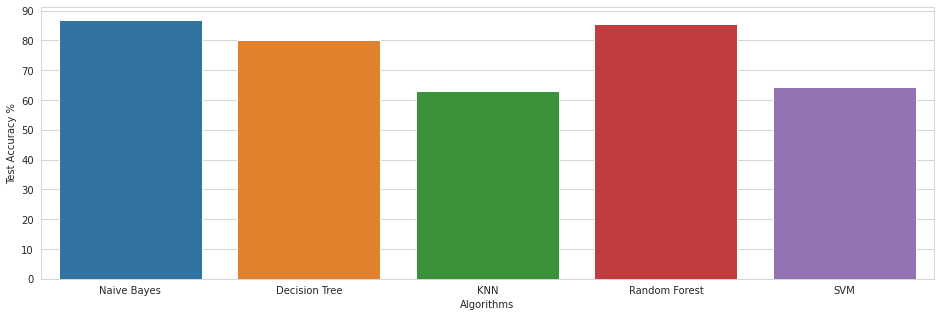

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Test Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=[ac['model'] for ac in accuracies], y=[ac['test_accuracy'] for ac in accuracies])
plt.show()

In [17]:
df1 = pd.DataFrame(accuracies, columns=['model', 'train_accuracy', 'test_accuracy'])
df1

,model,train_accuracy,test_accuracy
0,Naive Bayes,82.82,86.84
1,Decision Tree,100.00,80.26
2,KNN,79.30,63.16
3,Random Forest,100.00,85.53
4,SVM,64.76,64.47


# Cross Validation

In [18]:
cv = ShuffleSplit(test_size=0.25, n_splits=5)

In [19]:
cross_val_score(GaussianNB(), X, y)

array([0.80327869, 0.83606557, 0.78688525, 0.81666667, 0.75      ])

In [20]:
cross_val_score(DecisionTreeClassifier(), X, y)

array([0.72131148, 0.86885246, 0.75409836, 0.65      , 0.66666667])

In [21]:
cross_val_score(KNeighborsClassifier(), X, y)

array([0.60655738, 0.6557377 , 0.57377049, 0.73333333, 0.65      ])

In [22]:
cross_val_score(RandomForestClassifier(), X, y)

array([0.81967213, 0.91803279, 0.80327869, 0.83333333, 0.76666667])

In [23]:
cross_val_score(SVC(), X, y)

array([0.60655738, 0.62295082, 0.73770492, 0.66666667, 0.61666667])

# Hyper Parameter Tuning

In [24]:
model_parameters = {
    'Decision Tree' : {
        'model' : DecisionTreeClassifier(), 
        'params' : {
            'criterion' : ['gini', 'entropy'],
            'max_features' : ['auto', 'sqrt', 'log2']
        }
    },
    'KNN' : {
        'model' : KNeighborsClassifier(), 
        'params' : {
            'n_neighbors' : [2, 3, 5, 7],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree']
        }
    },
    'Random Forest' : {
        'model' : RandomForestClassifier(), 
        'params' : {
            'n_estimators' : [50, 300, 800, 1000],
            'random_state' : [1, 10, 100],
        }
    },
    'SVM' : {
        'model' : SVC(gamma='auto'),
        'params' : {
            'C' : [1, 10, 50],
            'kernel' : ['linear', 'poly', 'sigmoid']
        }
    }
}

In [25]:
cv_scores = []
cv_scores.append({
    'model' : 'Naive Bayes',
    'best_score' : nb.score(X_test, y_test),
    'best_parameter' : 'None'
})

for model_name, mp in model_parameters.items() :
    clf = GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, n_jobs = -1)
    clf.fit(X, y)
    cv_scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_parameter' : clf.best_params_
    })

In [26]:
df2 = pd.DataFrame(cv_scores, columns=['model', 'best_score', 'best_parameter'])

In [27]:
df2

,model,best_score,best_parameter
0,Naive Bayes,0.868421,None
1,Decision Tree,0.782178,"{'criterion': 'entropy', 'max_features': 'sqrt'}"
2,KNN,0.636964,"{'algorithm': 'auto', 'n_neighbors': 5}"
3,Random Forest,0.815182,"{'n_estimators': 50, 'random_state': 100}"
4,SVM,0.818482,"{'C': 50, 'kernel': 'linear'}"


In [29]:
df2.dtypes

model              object
best_score        float64
best_parameter     object
dtype: object

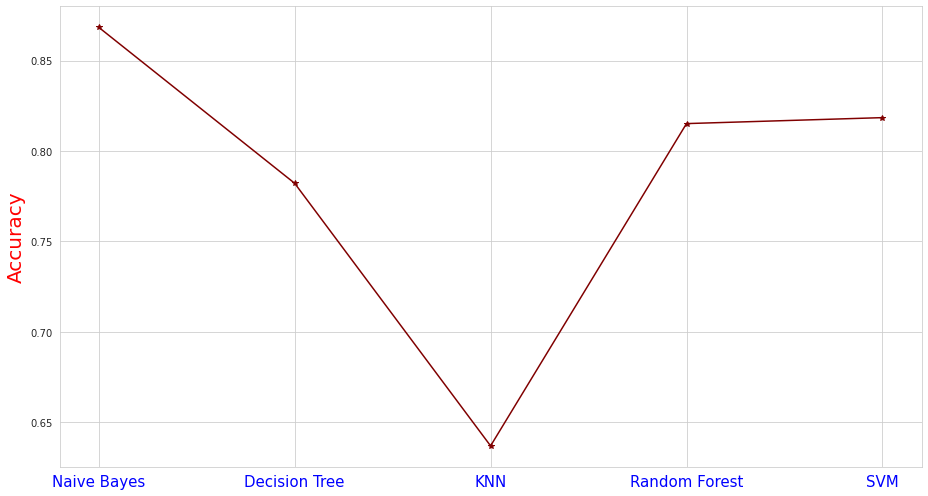

In [30]:
plt.figure(figsize = (13, 7)) 
plt.plot(df2['model'], df2['best_score'], marker="*" , color="maroon")
plt.ylabel("Accuracy", color="red", fontsize=20 )
plt.xticks(color="blue", fontsize=15) 
plt.grid(True)
plt.tight_layout()
plt.savefig("best_model.png")
plt.show()